In [1]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
faroun_data_1 = pd.read_csv("../../captions/faroun_youtube_channel_scripts.csv")
awalf_data_1 = pd.read_csv("../../captions/awalefofficial_youtube_channel_scripts.csv")
PetSmmile_data_1 = pd.read_csv("../../captions/Smiling-Pet_youtube_channel_scripts.csv")
### other metadata(duration , publishtime)
faroun_data_2 = pd.read_csv('../../captions/Faroun_cats_simple_video_metadata.csv')
awalf_data_2 = pd.read_csv("../../captions/awalefofficial_simple_youtube_channel_info.csv")

PetSmmile_data_2 = pd.concat([pd.read_csv("../../captions/Smiling-Pet_simple_youtube_channel_info.csv") ,
                             pd.read_csv("../../captions/Smiling-Pet_simple_youtube_channel_info_1.csv"),
                             pd.read_csv("../../captions/Smiling-Pet_simple_youtube_channel_info_2.csv"),
                             pd.read_csv("../../captions/Smiling-Pet_simple_youtube_channel_info_3.csv"),
                             pd.read_csv("../../captions/Smiling-Pet_simple_youtube_channel_info_4.csv")] , ignore_index=True)


## merged data
faroun_data = pd.merge(faroun_data_1 , faroun_data_2 , on='Video_ID')
awalf_data = pd.merge(awalf_data_1 , awalf_data_2 , on='Video_ID')
PetSmmile_data = pd.merge(PetSmmile_data_1 , PetSmmile_data_2 , on='Video_ID')

In [3]:
def eda_data_niche(data):
    print("Data set Info")
    display(data.head())
    print("------------------------------------")
    print("\n Descbtion of the data")
    display(data.describe())
    print("------------------------------------")
    print("data info")
    display(data.info())
eda_data_niche(PetSmmile_data)


Data set Info


,Video_ID,Title,Views,Caption_Snippet,Duration,Publish_Date
0,VpY4EOW9H2s,كيف تعرف أن قطتك تحاول الاعتذار منك؟ 😿❤️,52000,كيف تعرف ان قطتك تحاول الاعتذار منك؟ اولا تجلس...,00:19,2025-05-29
1,-iIWNCTQ5Z8,أكثر المشكلات الصحية شيوعًا في القطط 🙀,10000,لديك اربع من اكثر المشكلات الصحيه شيوعا في الق...,00:49,2025-05-28
2,xJj_1AQyIzQ,لماذا تعود القطط إلى أصحابها حتى بعد فقدانها؟ 🏠🐾,29000,لماذا تعود القطط الى اصحابها حتى بعد فقدانها؟ ...,00:23,2025-05-27
3,hi3WhH9wrWI,هل القطط تتذكر أصحابها بعد غياب طويل؟ ⏳🐈,21000,هل تتذكرك قطك بعد غياب طويل؟ اولا: القطط تملك ...,00:23,2025-05-26
4,10aKcHsoDHc,إذا فعلت قطتك هذا، فهي تحبك بجنون! ❤️🐾,35000,هل قطتك تحبك بجنون؟ اولا تنام على صدرك او بجان...,00:17,2025-05-25


------------------------------------

 Descbtion of the data


,Views
count,5.040000e+02
mean,8.097639e+04
std,2.701920e+05
min,3.100000e+03
25%,2.000000e+04
50%,3.300000e+04
75%,4.925000e+04
max,3.700000e+06


------------------------------------
data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Video_ID         504 non-null    object
 1   Title            504 non-null    object
 2   Views            504 non-null    int64 
 3   Caption_Snippet  504 non-null    object
 4   Duration         504 non-null    object
 5   Publish_Date     504 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.8+ KB


None

In [4]:
def data_youtube_cleaning(data):
    data.drop('Video_ID' ,axis = 1 , inplace = True)
    
    if data is faroun_data :
        data['Upload_Date'] = pd.to_datetime(data['Upload_Date'] , format='%Y%m%d') 
    if data is awalf_data or data is PetSmmile_data : 
        data['Duration'] = pd.to_timedelta('00:' + data['Duration'])
        data['Duration'] = data['Duration'].dt.total_seconds().astype(int)
        data = data.drop_duplicates()
    return data
faroun_data = data_youtube_cleaning(faroun_data)
awalf_data = data_youtube_cleaning(awalf_data)
PetSmmile_data = data_youtube_cleaning(PetSmmile_data)
eda_data_niche(PetSmmile_data)

Data set Info


,Title,Views,Caption_Snippet,Duration,Publish_Date
0,كيف تعرف أن قطتك تحاول الاعتذار منك؟ 😿❤️,52000,كيف تعرف ان قطتك تحاول الاعتذار منك؟ اولا تجلس...,19,2025-05-29
1,أكثر المشكلات الصحية شيوعًا في القطط 🙀,10000,لديك اربع من اكثر المشكلات الصحيه شيوعا في الق...,49,2025-05-28
2,لماذا تعود القطط إلى أصحابها حتى بعد فقدانها؟ 🏠🐾,29000,لماذا تعود القطط الى اصحابها حتى بعد فقدانها؟ ...,23,2025-05-27
3,هل القطط تتذكر أصحابها بعد غياب طويل؟ ⏳🐈,21000,هل تتذكرك قطك بعد غياب طويل؟ اولا: القطط تملك ...,23,2025-05-26
4,إذا فعلت قطتك هذا، فهي تحبك بجنون! ❤️🐾,35000,هل قطتك تحبك بجنون؟ اولا تنام على صدرك او بجان...,17,2025-05-25


------------------------------------

 Descbtion of the data


,Views,Duration
count,5.000000e+02,500.000000
mean,8.136420e+04,31.030000
std,2.712345e+05,6.759622
min,3.100000e+03,17.000000
25%,2.000000e+04,27.000000
50%,3.300000e+04,30.000000
75%,4.925000e+04,33.250000
max,3.700000e+06,60.000000


------------------------------------
data info
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 503
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            500 non-null    object
 1   Views            500 non-null    int64 
 2   Caption_Snippet  500 non-null    object
 3   Duration         500 non-null    int64 
 4   Publish_Date     500 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.4+ KB


None

C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11035 (\N{BLACK LARGE SQUARE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128008 (\N{CAT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


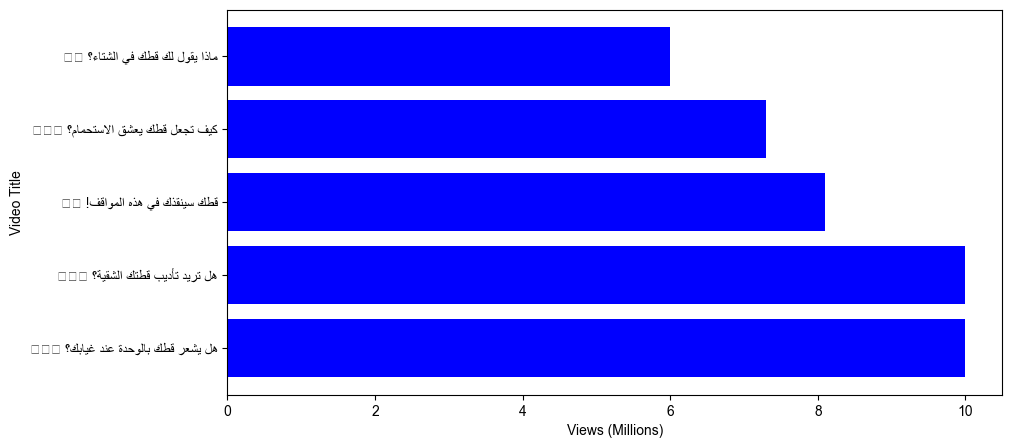

C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127810 (\N{FALLEN LEAF}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127808 (\N{FOUR LEAF CLOVER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128049 (\N{CAT FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from font(s) Arial.

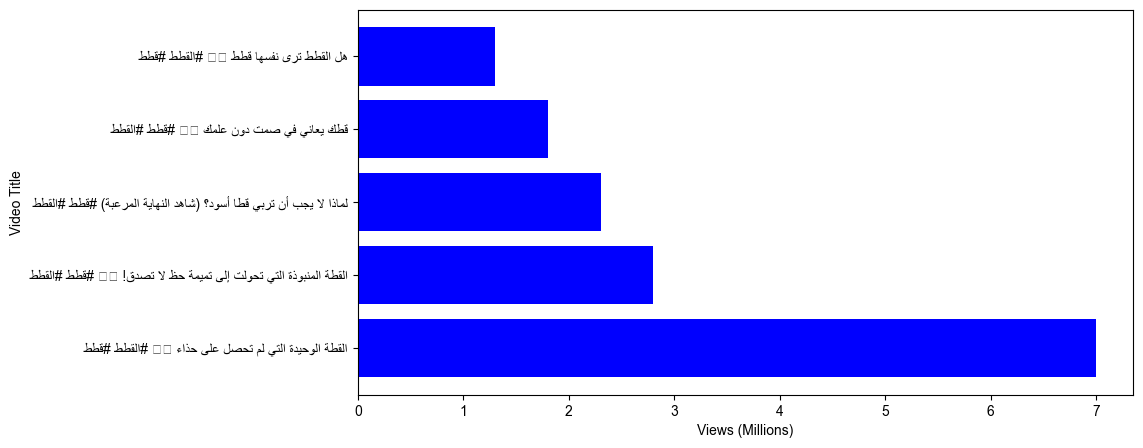

C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128571 (\N{SMILING CAT FACE WITH HEART-SHAPED EYES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128570 (\N{SMILING CAT FACE WITH OPEN MOUTH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anasl\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128568 (\N{GRINNING CAT FACE WITH SMILING EYES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


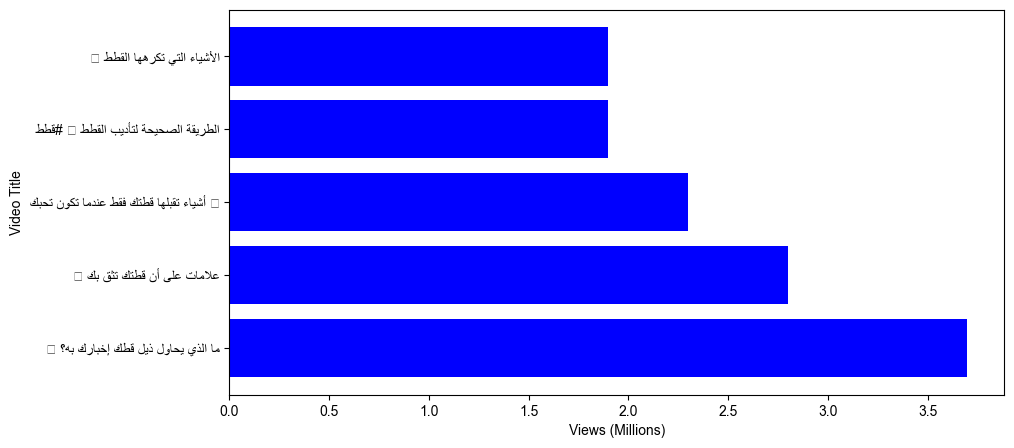

In [5]:
import arabic_reshaper
from bidi.algorithm import get_display
def top_5_videos_performance(data):
    data = data.nlargest(5 , 'Views')
    data_views = data['Views']/1000000
    plt.figure(figsize=(10,5))
    plt.rcParams['font.family'] = 'Arial'
    video_titles_rtl = [get_display(arabic_reshaper.reshape(title)) for title in data['Title']]

    plt.barh(video_titles_rtl ,data_views , color='blue')
    plt.ylabel('Video Title')
    plt.xlabel('Views (Millions)')
    plt.show()

top_5_videos_performance(awalf_data)
top_5_videos_performance(faroun_data)
top_5_videos_performance(PetSmmile_data)


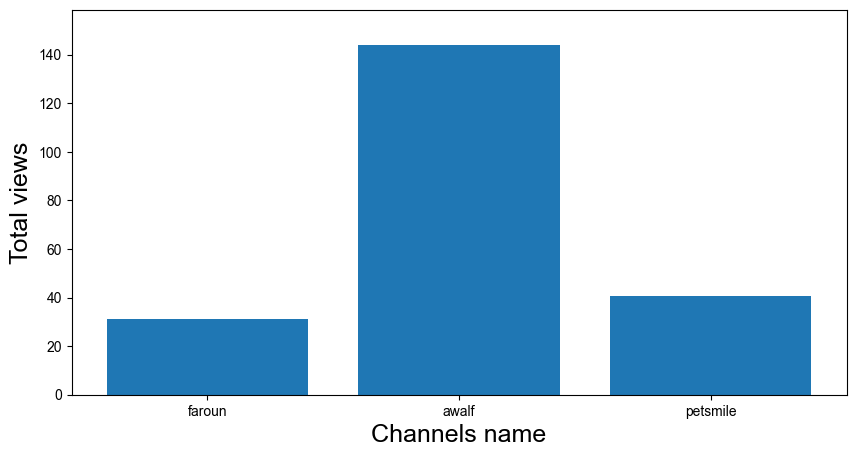

In [6]:
"""
   How many views every channel have 
"""


creators_channels_total_views_list = [ {'name' : 'faroun' , 'total_views' : f"{(faroun_data['Views']/1000000).sum()}" }
                             ,{'name' : 'awalf' , 'total_views' : f"{(awalf_data['Views']/1000000).sum()}" }
                             , {'name' : 'petsmile' , 'total_views' : f"{(PetSmmile_data['Views']/1000000).sum()}" }]
creators_channels_total_views = pd.DataFrame(creators_channels_total_views_list)
creators_channels_total_views['total_views'] = creators_channels_total_views['total_views'].astype(float)
plt.figure(figsize=(10,5))
plt.bar(creators_channels_total_views['name'] , creators_channels_total_views['total_views'])
plt.xlabel('Channels name' , fontsize = 18 , color ='black')
plt.ylabel('Total views' , fontsize = 18 , color ='black')
plt.ylim(0, creators_channels_total_views['total_views'].max() * 1.1)
plt.show()



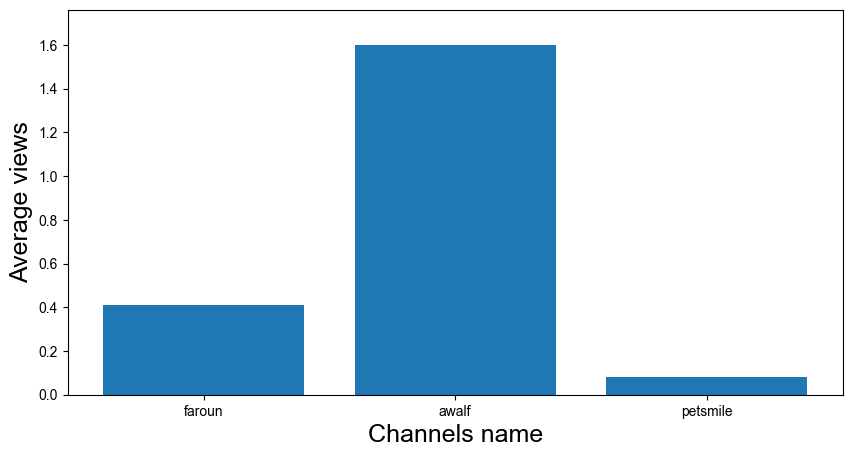

In [7]:
creators_channels_average_view_list = [ {'name' : 'faroun' , 'average_view' : f"{(faroun_data['Views']/1000000).mean()}" }
                             ,{'name' : 'awalf' , 'average_view' : f"{(awalf_data['Views']/1000000).mean()}" }
                             , {'name' : 'petsmile' , 'average_view' : f"{(PetSmmile_data['Views']/1000000).mean()}" }]
creators_channels_average_view = pd.DataFrame(creators_channels_average_view_list)
creators_channels_average_view['average_view'] = creators_channels_average_view['average_view'].astype(float)
plt.figure(figsize=(10,5))
plt.bar(creators_channels_average_view['name'] , creators_channels_average_view['average_view'])
plt.xlabel('Channels name' , fontsize = 18 , color ='black')
plt.ylabel('Average views' , fontsize = 18 , color ='black')
plt.ylim(0, creators_channels_average_view['average_view'].max() * 1.1)
plt.show()

In [8]:

def viralty_duration(name , data):
    print(f"""\n-------
          {name}
-------
          """)
    viral_data = data[data['Views'] > 1000000]
    unviral_data = data[data['Views'] < 100000]
    print("----mean------")
    print(data['Duration'].mean())
    print(f"-----viral_{name}------")
    print(viral_data['Duration'].mean())
    print(f"-----viral_{name}_count------")
    print(viral_data.shape[0])
    print(f"-----unviral_{name}------")
    print(unviral_data['Duration'].mean())
    print(f"-----unviral_{name}_count------")
    print(unviral_data['Duration'].shape[0])
    print("------------------------------------------")
    

In [9]:
viralty_duration("awalf" , awalf_data)
viralty_duration("faroun" , faroun_data)
viralty_duration("petsmile ",PetSmmile_data)



-------
          awalf
-------
          
----mean------
50.81111111111111
-----viral_awalf------
52.325
-----viral_awalf_count------
40
-----unviral_awalf------
37.333333333333336
-----unviral_awalf_count------
6
------------------------------------------

-------
          faroun
-------
          
----mean------
50.223684210526315
-----viral_faroun------
59.5
-----viral_faroun_count------
6
-----unviral_faroun------
48.458333333333336
-----unviral_faroun_count------
24
------------------------------------------

-------
          petsmile 
-------
          
----mean------
31.03
-----viral_petsmile ------
33.0
-----viral_petsmile _count------
5
-----unviral_petsmile ------
30.569794050343248
-----unviral_petsmile _count------
437
------------------------------------------


In [10]:
viral_PetSmmile_data = PetSmmile_data[PetSmmile_data['Views'] > 100000]
viral_awalf_data = awalf_data[awalf_data['Views'] > 100000]
viral_faroun_data = faroun_data[faroun_data['Views'] > 100000]


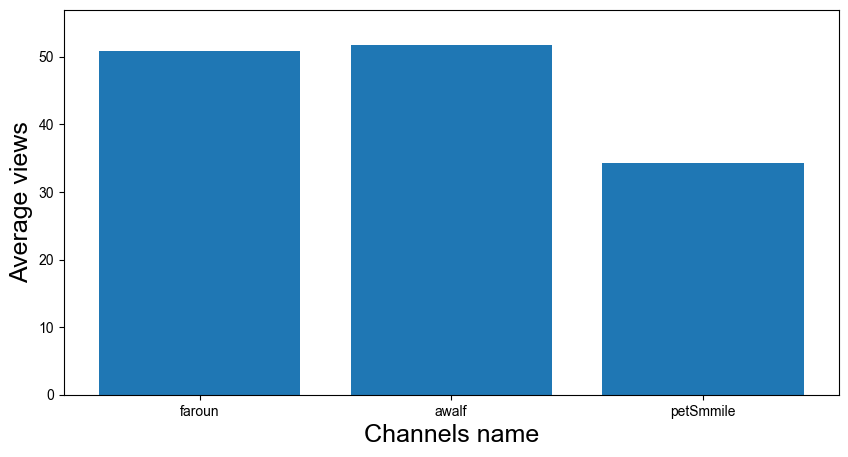

In [11]:
creators_channels_average_Duration_list = [ {'name' : 'faroun' , 'average_Duration' : f"{(viral_faroun_data['Duration']).mean()}" }
                             ,{'name' : 'awalf' , 'average_Duration' : f"{(viral_awalf_data['Duration']).mean()}" }
                             ,{'name' : 'petSmmile' , 'average_Duration' : f"{(viral_PetSmmile_data['Duration']).mean()}" }
                            ]
creators_channels_average_Duration = pd.DataFrame(creators_channels_average_Duration_list)
creators_channels_average_Duration['average_Duration'] = creators_channels_average_Duration['average_Duration'].astype(float)
plt.figure(figsize=(10,5))
plt.bar(creators_channels_average_Duration['name'] , creators_channels_average_Duration['average_Duration'])
plt.xlabel('Channels name' , fontsize = 18 , color ='black')
plt.ylabel('Average views' , fontsize = 18 , color ='black')
plt.ylim(0, creators_channels_average_Duration['average_Duration'].max() * 1.1)
plt.show()

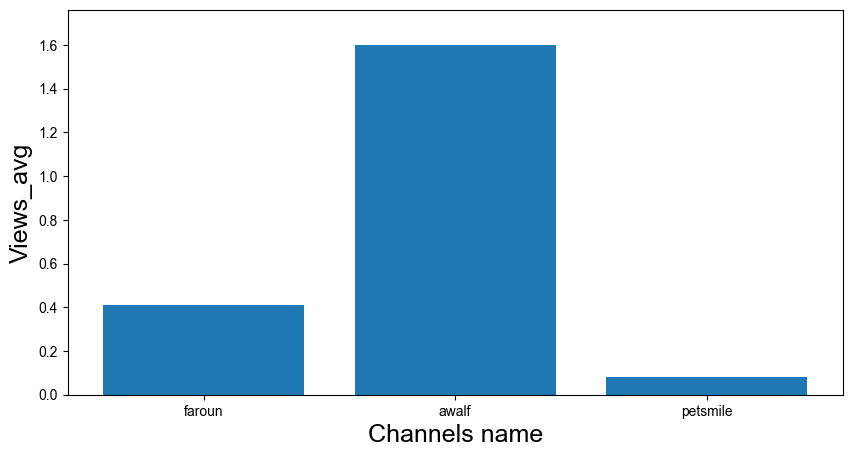

In [12]:
def creators_chart_comparasion(metric):
    creators_channels_avg_list = [ 
                            {'name' : 'faroun' , 'metric_avg' : f"{(faroun_data[metric]).mean()/1000000}" }
                             ,{'name' : 'awalf' , 'metric_avg' : f"{(awalf_data[metric]).mean()/1000000}" }
                             , {'name' : 'petsmile' , 'metric_avg' : f"{(PetSmmile_data[metric]/1000000).mean()}" }]
    creators_channels_avg = pd.DataFrame(creators_channels_avg_list)
    creators_channels_avg['metric_avg'] = creators_channels_avg['metric_avg'].astype(float)
    plt.figure(figsize=(10,5))
    plt.bar(creators_channels_avg['name'] , creators_channels_avg['metric_avg'])
    plt.xlabel('Channels name' , fontsize = 18 , color ='black')
    plt.ylabel(f'{metric}_avg' , fontsize = 18 , color ='black')
    plt.ylim(0, creators_channels_avg['metric_avg'].max() * 1.1)
    plt.show()
creators_chart_comparasion('Views')

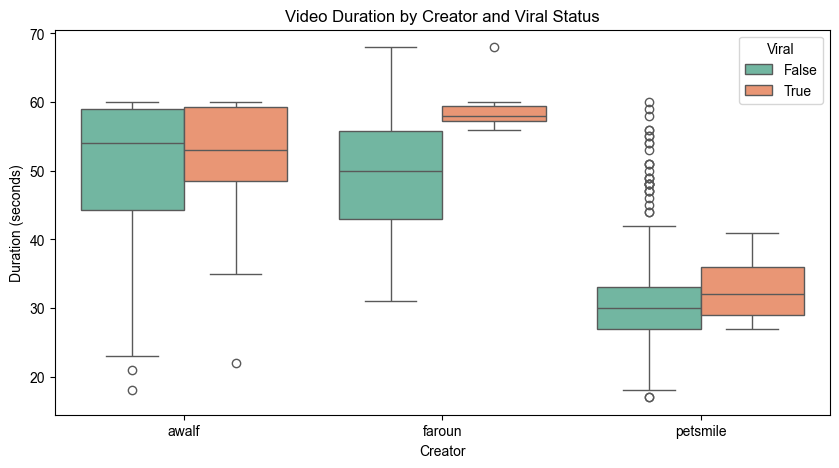

In [19]:
awalf_data['Creator'] = 'awalf'
faroun_data['Creator'] = 'faroun'
PetSmmile_data['Creator'] = 'petsmile'

all_data = pd.concat([awalf_data  , faroun_data , PetSmmile_data] , ignore_index=True)

all_data['is_viral'] = all_data['Views'] > 1000000

plt.figure(figsize=(10,5))
sns.boxplot(data=all_data , x='Creator' , y='Duration' , hue='is_viral' , palette='Set2')
plt.title('Video Duration by Creator and Viral Status')
plt.ylabel('Duration (seconds)')
plt.xlabel('Creator')
plt.legend(title='Viral')
plt.show()